In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [128]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


change object data to make it easier for linear regression model

In [130]:
# Create dummy variables for ocean_proximity
ocean_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean')

# Drop the original ocean_proximity column and join the dummy variables
df = df.drop('ocean_proximity', axis=1)
df = pd.concat([df, ocean_dummies], axis=1)


In [131]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_<1H OCEAN         0
ocean_INLAND            0
ocean_ISLAND            0
ocean_NEAR BAY          0
ocean_NEAR OCEAN        0
dtype: int64

we will replace null values in total_bedrooms with median of this column

In [132]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

check for outliers

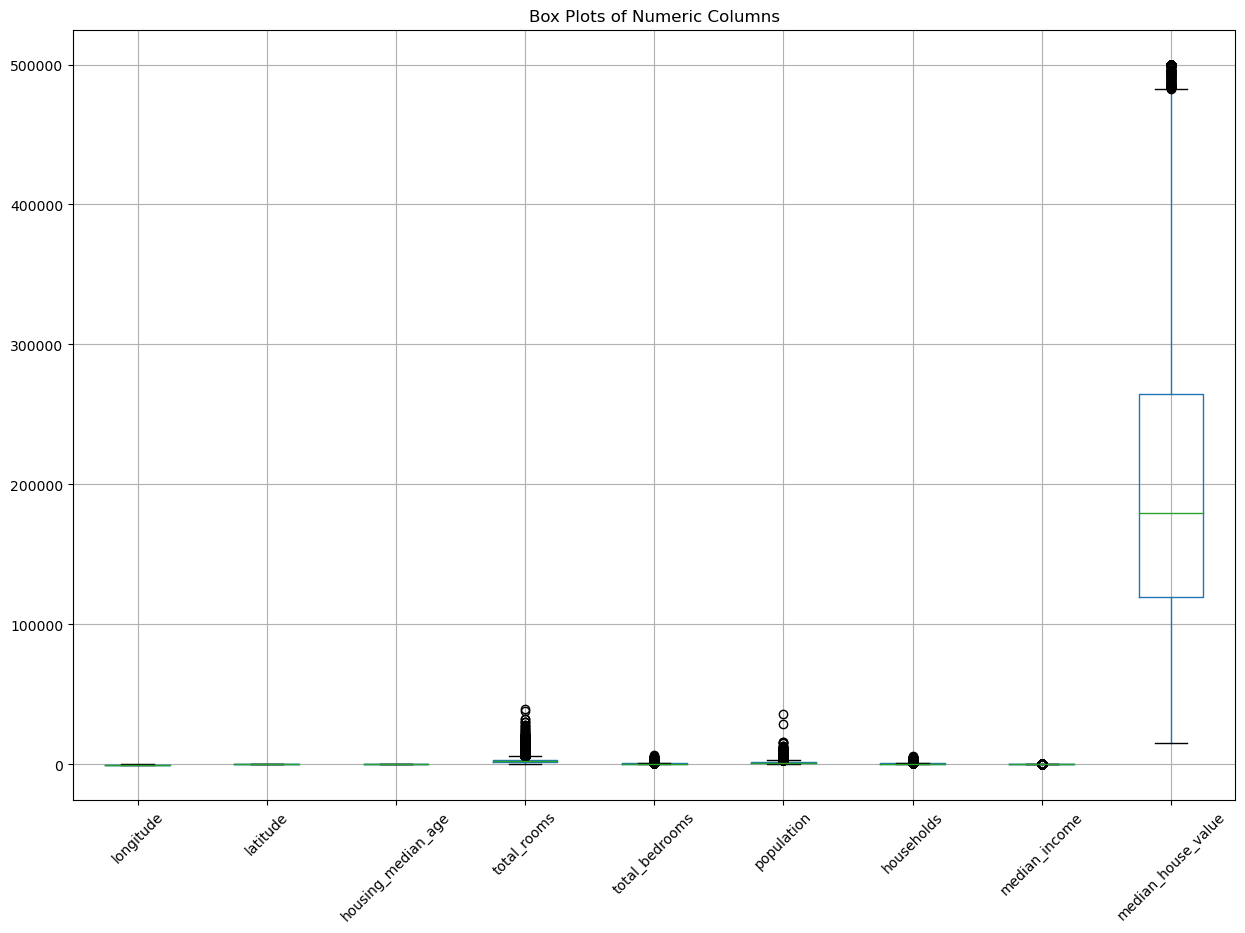


longitude:
Number of outliers: 0
Percentage of outliers: 0.00%

latitude:
Number of outliers: 0
Percentage of outliers: 0.00%

housing_median_age:
Number of outliers: 0
Percentage of outliers: 0.00%

total_rooms:
Number of outliers: 1287
Percentage of outliers: 6.24%

total_bedrooms:
Number of outliers: 1306
Percentage of outliers: 6.33%

population:
Number of outliers: 1196
Percentage of outliers: 5.79%

households:
Number of outliers: 1220
Percentage of outliers: 5.91%

median_income:
Number of outliers: 681
Percentage of outliers: 3.30%

median_house_value:
Number of outliers: 1071
Percentage of outliers: 5.19%


In [133]:
# Create box plots for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Numeric Columns')
plt.show()

# Calculate IQR and identify outliers
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f'\n{column}:')
    print(f'Number of outliers: {outliers}')
    print(f'Percentage of outliers: {(outliers/len(df)*100):.2f}%')

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [135]:
x = df.drop(columns=['median_house_value'])
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [136]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4908476721.156615
R^2 Score: 0.6254240620553606
